In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28)))
model.add(
    layers.Bidirectional(layers.LSTM(256, return_sequences=True, activation="relu"))
)
model.add(layers.LSTM(256, name="lstm_layer2"))
model.add(layers.Dense(10))

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, None, 512)         583680    
_________________________________________________________________
lstm_layer2 (LSTM)           (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 1,373,706
Trainable params: 1,373,706
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

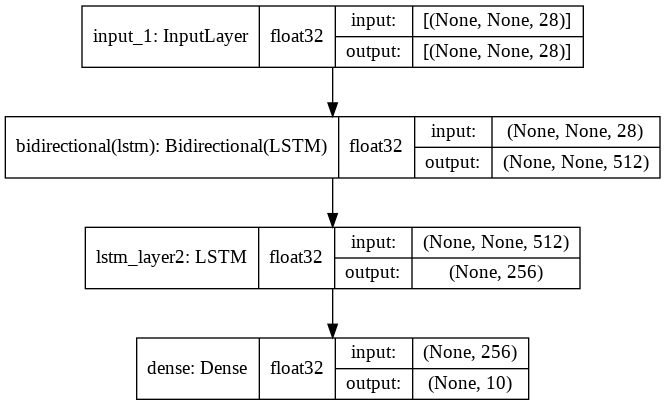

In [11]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96,
    layer_range=None
)

In [8]:
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

Epoch 1/10
938/938 - 76s - loss: 0.2700 - accuracy: 0.9119
Epoch 2/10
938/938 - 70s - loss: 0.0790 - accuracy: 0.9765
Epoch 3/10
938/938 - 69s - loss: 0.0585 - accuracy: 0.9827
Epoch 4/10
938/938 - 69s - loss: 0.0438 - accuracy: 0.9865
Epoch 5/10
938/938 - 69s - loss: 0.0377 - accuracy: 0.9886
Epoch 6/10
938/938 - 69s - loss: 0.0315 - accuracy: 0.9903
Epoch 7/10
938/938 - 70s - loss: 0.0268 - accuracy: 0.9918
Epoch 8/10
938/938 - 69s - loss: 0.0244 - accuracy: 0.9926
Epoch 9/10
938/938 - 70s - loss: 0.0215 - accuracy: 0.9933
Epoch 10/10
938/938 - 70s - loss: 0.0180 - accuracy: 0.9944


In [9]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 2s - loss: 0.0315 - accuracy: 0.9907


[0.031485117971897125, 0.9907000064849854]